In [1]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk")

from sklearn.datasets import make_blobs

In [2]:
#colouring of the classes and centers
k = 3 #adjust number of classes to number of colors below. 
group_colors = ['skyblue', 'coral', 'lightgreen']
center_colors = ['blue', 'darkred', 'green']

In [3]:
def initialize_clusters(points, k):
    """Initializes clusters as k randomly selected points from points."""
    return points[np.random.randint(points.shape[0], size=k)]
    
def get_distances(centroid, points):
    """Returns the distance the centroid is from each data point in points."""
    return np.linalg.norm(points - centroid, axis=1, ord= 2) #you can try different metrics, ord=np.inf, ord=1

def calculate_loss(centroids, clusters, k=k):
    accum = 0
    for c in range(k):
        accum += np.sum(np.power(get_distances(centroids[c], X[clusters == c]), 2))
    return accum

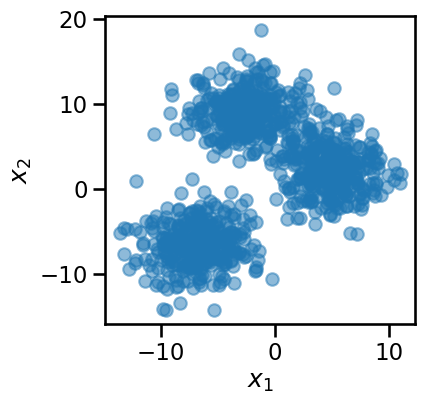

In [4]:
# Generate dataset
X, y = make_blobs(centers=k, n_samples=1000, cluster_std=2.5, random_state=42)

# Visualize
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

In [5]:
maxiter = 50
eps = 1e-3
# Initialize our centroids by picking random data points
centroids = initialize_clusters(X, k)

# Initialize the vectors in which we will store the
# assigned classes of each data point and the
# calculated distances from each centroid
clusters = np.zeros(X.shape[0], dtype=np.int32)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

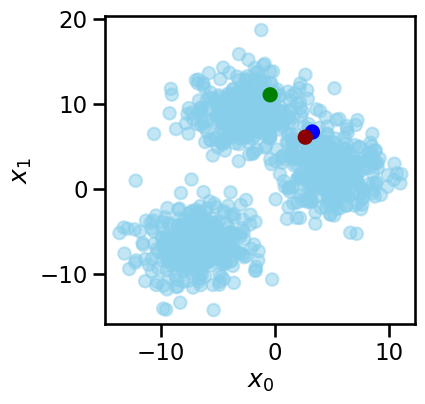

In [6]:
#show initial setup
colors = [group_colors[j] for j in clusters]
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color=center_colors, marker='o', lw=2)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$');

### plain code

In [7]:
i = 0
old_loss = np.inf
delta_loss = np.inf

while ((i < maxiter) & (delta_loss > eps)):
  
    # Calculate distance of all points to the all centroids
    for j, c in enumerate(centroids):
        distances[:, j] = get_distances(c, X)
        
    # Determine cluster membership of each point
    # by picking the closest centroid
    clusters = np.argmin(distances, axis=1)

    # Update centroid location using the newly
    # assigned data point cluster
    for c in range(k):
        centroids[c] = np.mean(X[clusters == c], 0)
    
    # For loss criterion calculate sum of squared distances to cluster centroid

    loss = calculate_loss(centroids, clusters)
    delta_loss = np.abs(old_loss - loss)
    old_loss = loss
    i = i+1

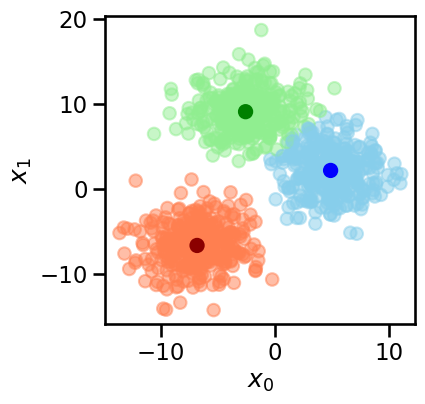

In [8]:
#show final result
colors = [group_colors[j] for j in clusters]
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color=center_colors, marker='o', lw=2)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$');

### code which preserves losses and shows steps graphically

In [9]:
# Initialize the vectors again to start from scratch
np.random.seed(17) #generates a more interesting start
centroids = initialize_clusters(X, k)
clusters = np.zeros(X.shape[0], dtype=np.int32)
distances = np.zeros([X.shape[0], k], dtype=np.float64)

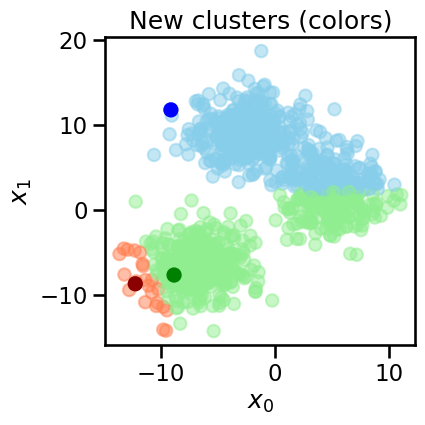

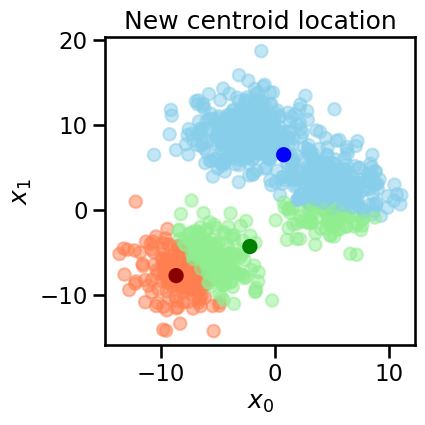

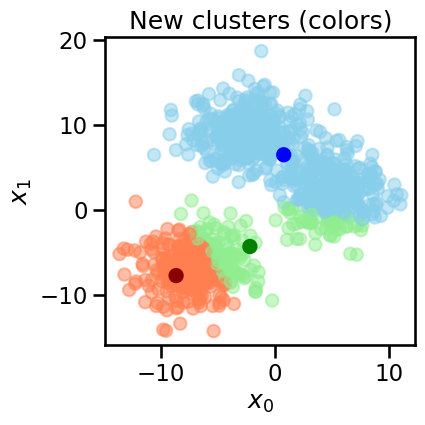

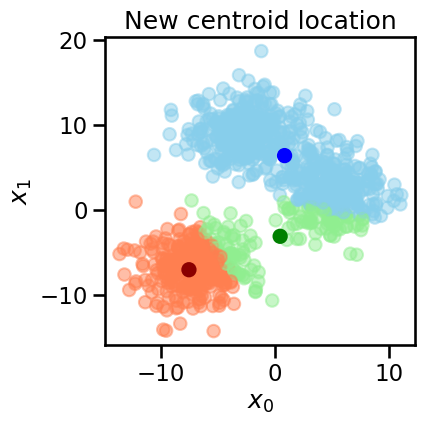

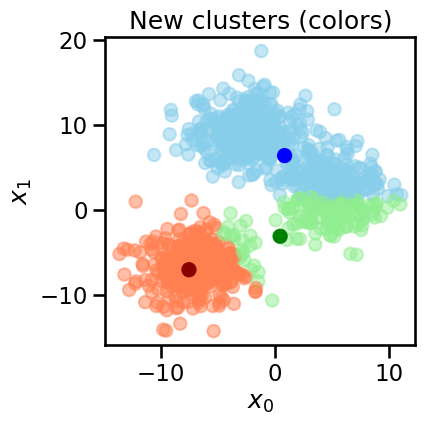

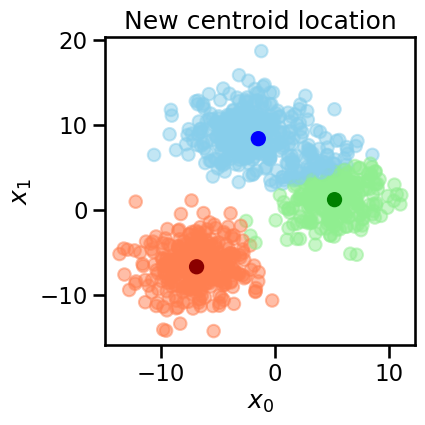

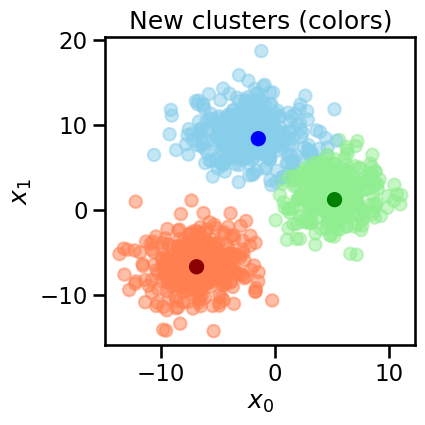

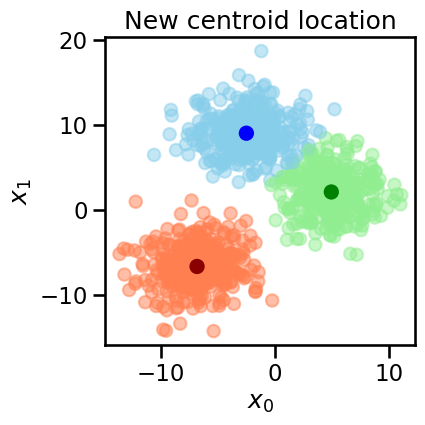

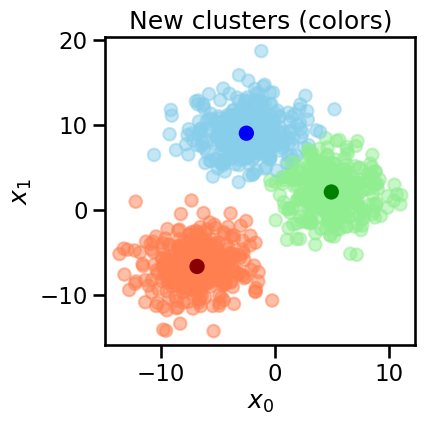

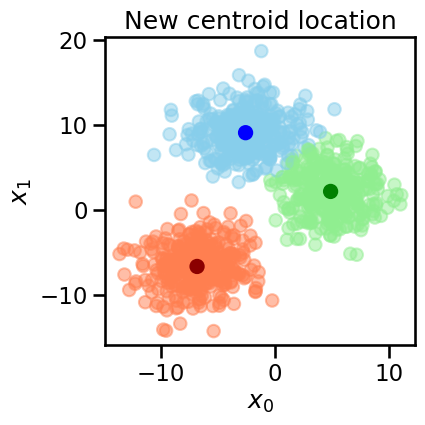

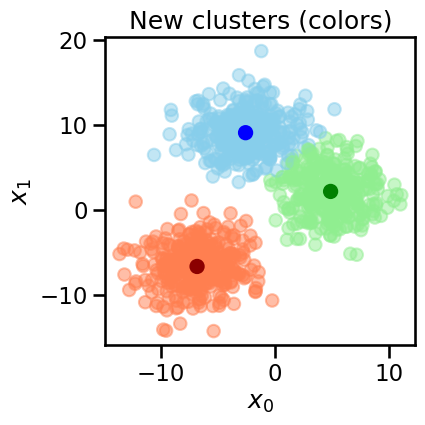

In [10]:
# Loop for the maximum number of iterations
i = 0
old_loss = np.inf
delta_loss = np.inf
losses = [] #keep all losses

while ((i < maxiter) & (delta_loss > eps)):
    
    # Calculate distance of all points to the all centroids
    for j, c in enumerate(centroids):
        distances[:, j] = get_distances(c, X)
        
    # Determine cluster membership of each point
    # by picking the closest centroid
    clusters = np.argmin(distances, axis=1)
    
    # Show how the clusters are re-colored
    if (i % 2 == 0):
        colors = [group_colors[j] for j in clusters]
        fig, ax = plt.subplots(figsize=(4,4))
        ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
        ax.scatter(centroids[:,0], centroids[:,1], color=center_colors, marker='o', lw=2)
        ax.set_xlabel('$x_0$')
        ax.set_ylabel('$x_1$')
        plt.title("New clusters (colors)");
        
    
    # Update centroid location using the newly
    # assigned data point cluster
    for c in range(k):
        centroids[c] = np.mean(X[clusters == c], 0)
    
    # For loss criterion calculate sum of squared distances to cluster centroid
    loss = calculate_loss(centroids, clusters)
    delta_loss = np.abs(old_loss - loss)
    old_loss = loss
    i = i+1
    losses.append(loss) #show development of loss
    
    # Show how the centroids move towards the clusters 
    if (i % 2 == 0):
        colors = [group_colors[j] for j in clusters]
        fig, ax = plt.subplots(figsize=(4,4))
        ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
        ax.scatter(centroids[:,0], centroids[:,1], color=center_colors, marker='o', lw=2)
        ax.set_xlabel('$x_0$')
        ax.set_ylabel('$x_1$')
        plt.title("New centroid location");
        
        

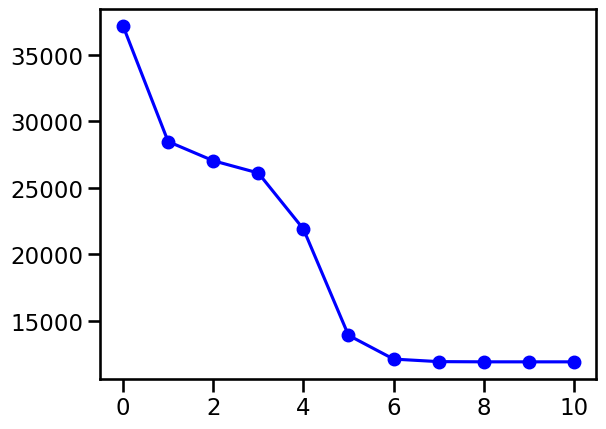

In [11]:
#show the change of the loss criterion
plt.plot( losses, 'bo-')